In [1]:
import sys
dirname = '/Users/muhammaddaffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

import pandas as pd
import numpy as np
from smt.surrogate_models import KRG
from smt.problems import WingWeight
from smt.sampling_methods import LHS
from sklearn.metrics import mean_squared_error


from smt.applications.explainability_tools import (
    PartialDependenceDisplay, 
    PDFeatureImportanceDisplay, 
    PDFeatureInteractionDisplay,
    ShapFeatureImportanceDisplay,
    ShapFeatureImportanceDisplay2,
    ShapDisplay2,
    ShapDisplay3,
)


In [2]:
ndoe = 300 
fun = WingWeight()
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
X = sampling(ndoe)
y = fun(X)

n_train = int(0.8 * ndoe)

X_tr, y_tr = X[:n_train, :], y[:n_train]
X_te, y_te = X[n_train:, :], y[n_train:]

## config
feature_names = [
    r'$S_{w}$', r'$W_{fw}$', r'$A$', r'$\Delta$', 
    r'$q$', r'$\lambda$', r'$t_{c}$', r'$N_{z}$', 
    r'$W_{dg}$', r'$W_{p}$',
]

class GroundTruthModel:
    def predict_values(self, X):
        return fun(X)

In [3]:
sm = KRG(
    theta0=[1e-2]*X_tr.shape[1],
    print_prediction = False
    )
sm.set_training_values(
    X_tr, 
    y_tr
    )

sm.train()

print("Surrogate model")
y_pred = sm.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rrmse = rmse / y_te.mean()
print(f"RMSE: {rmse:.4f}")
print(f"rRMSE: {rrmse:.4f}")

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 240
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  5.2281458
Surrogate model
RMSE: 0.1650
rRMSE: 0.0006


CPU times: user 1min 20s, sys: 2min 44s, total: 4min 4s
Wall time: 35.3 s


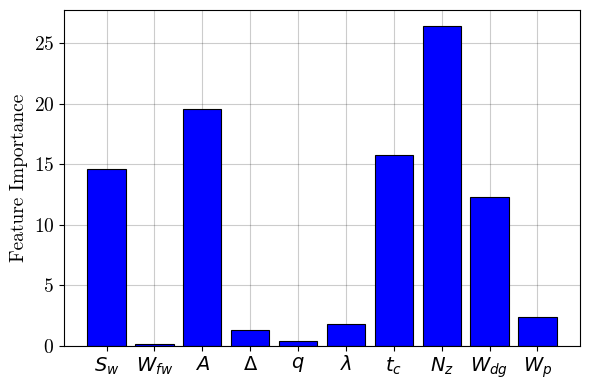

In [4]:
%%time
model = sm
X = X_tr

shap_feature_importance = ShapFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    feature_names=feature_names,
)

CPU times: user 12min 51s, sys: 11min 54s, total: 24min 46s
Wall time: 4min 22s


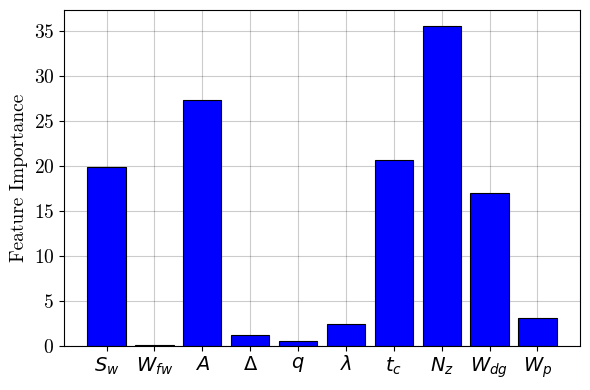

In [5]:
%%time
model = sm
X = X_tr

shap_feature_importance_2 = ShapFeatureImportanceDisplay2.from_surrogate_model(
    model, 
    X_tr, 
    feature_names=feature_names,
)

In [6]:
%%time
instances = X_tr
model = sm
X = X_tr
explainer_1 = ShapDisplay2.from_surrogate_model(
    instances, 
    model, 
    X, 
    feature_names=feature_names,
)

CPU times: user 1min 51s, sys: 2min 20s, total: 4min 11s
Wall time: 35.5 s


In [7]:
%%time
instances = X_tr
model = sm
X = X_tr
explainer_2 = ShapDisplay3.from_surrogate_model(
    instances, 
    model, 
    X, 
    feature_names=feature_names,
)

CPU times: user 13min 23s, sys: 11min 14s, total: 24min 37s
Wall time: 4min 19s


CPU times: user 120 ms, sys: 18.4 ms, total: 138 ms
Wall time: 163 ms


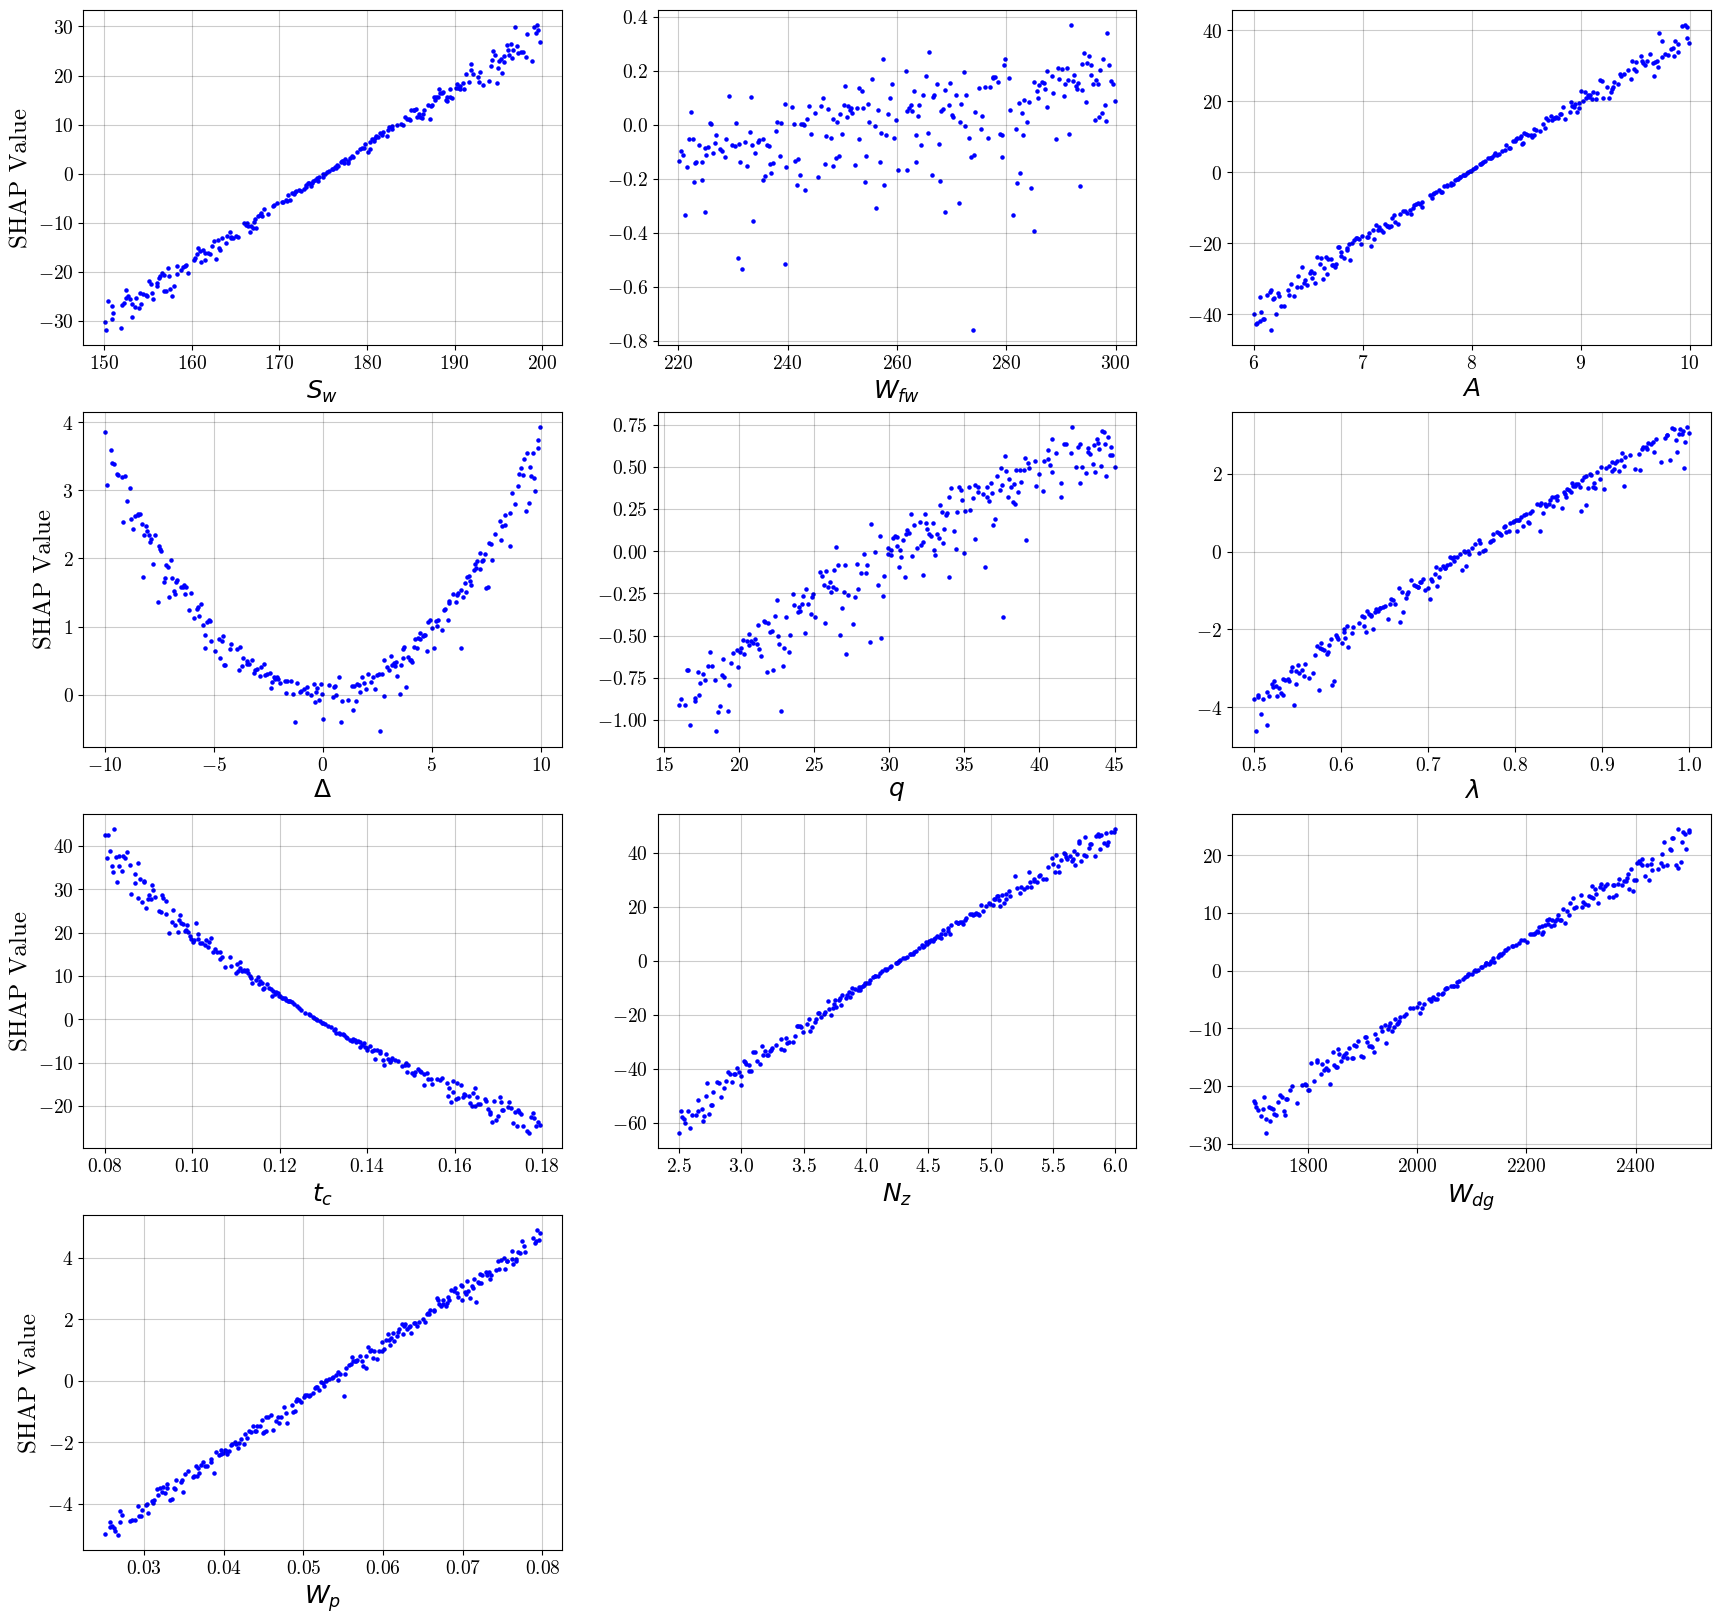

In [8]:
%%time
features = [i for i in range(X_tr.shape[1])]

shap_dependence_1 = explainer_1.dependence_plot(features)

CPU times: user 93.6 ms, sys: 14.1 ms, total: 108 ms
Wall time: 103 ms


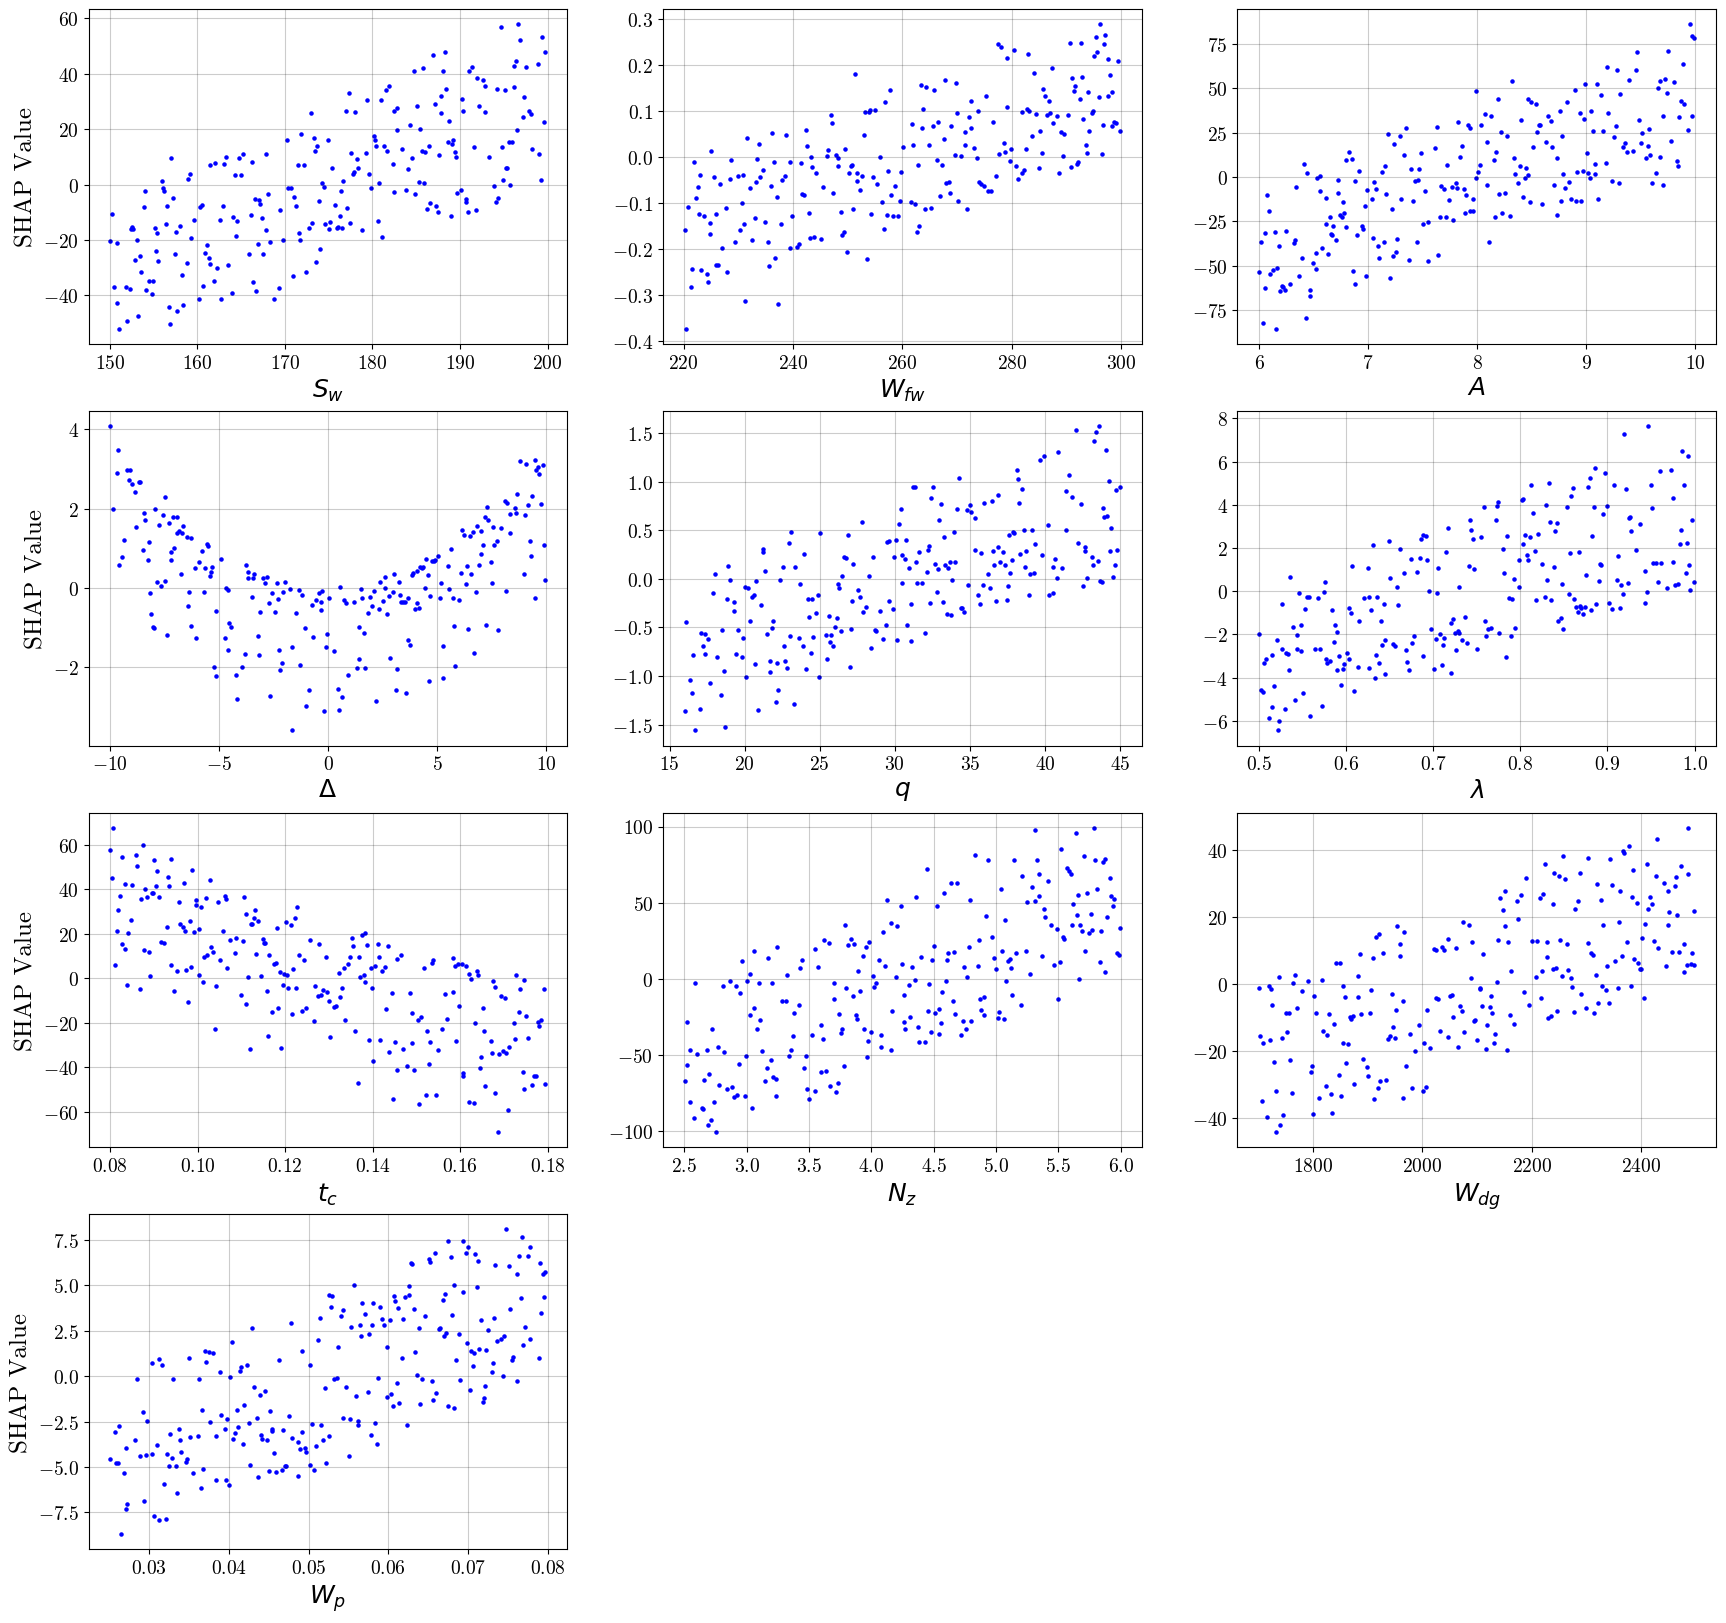

In [9]:
%%time
features = [i for i in range(X_tr.shape[1])]

shap_dependence_2 = explainer_2.dependence_plot(features)